In [ ]:
import defs
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from scipy import constants
from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
sys.path.append('/Users/max/HiPACE/src/tools/')
import read_insitu_diagnostics as diag

plt.rc('text', usetex = True)
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.figsize'] = [10.0, 6.0]
plt.rcParams['font.size'] = 16
plt.style.use('classic')

step = False
r = True
n = True

sub = 'Glenbox'

p = f'/Users/max/HiPACE/Fork/hdf5/{sub}/'
ip = f'/Users/max/HiPACE/Fork/insitu/{sub}/'

data = defs.Functions(path = p, insitu_path = ip, n0 = 1e17, iteration = 0, normalized = n, recovery = r, mesh_refinement = True)

IA = constants.m_e * constants.c**3 / constants.e

data.customCMAP()

In [235]:
w = data.emittance(0.05, 1.25, True)
iw = diag.emittance_x(data.witnessInsitu['average'])

print(w,iw[0]*data.kp_inv)


1.050289900322012e-06 1.0509661431558611e-06


In [243]:
print(f'Drive {data.charge(q = diag.total_charge(data.driveInsitu))[0] * 1e9} nC\tWitness {data.charge(q = diag.total_charge(data.witnessInsitu))[0] * 1e9} nC\tRecovery {data.charge(q = diag.total_charge(data.recoveryInsitu))[0] * 1e9} nC')

Drive -3.376858205053642 nC	Witness 0.4007734504867815 nC	Recovery -0.5987392327012322 nC


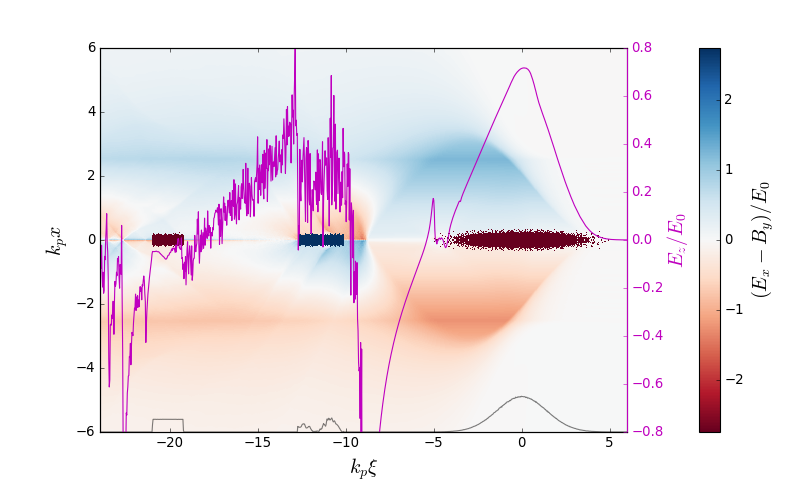

In [244]:
s = 2.75
col = 'm'
pd = .9
prfl = 'k'

plt.close()
fig, axs = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 6)) # , gridspec_kw={'width_ratios': [1.75, 1]})
# plt.subplots_adjust(hspace=0.075)

im = axs.pcolormesh(data.info.z, data.info.x, data.ExmBy.T, cmap = 'RdBu', vmin = -s, vmax = s) # level 0
axs.pcolormesh(data.info_lev1.z, data.info_lev1.x, data.ExmBy_lev1.T, cmap = 'RdBu', vmin = -s, vmax = s) # level 1
# axs.pcolormesh(data.info.z, data.info.x, data.jz_beam.T * IA, cmap = 'RdBuT', vmin = -1e15, vmax = 1e15) # level 0
axs.pcolormesh(data.info_lev1.z, data.info_lev1.x, data.jz_beam_lev1.T * IA, cmap = 'RdBuT', vmin = -1e4, vmax = 1e4) # level 1

axs.plot(data.info.z, 1e-8 * data.profile[data.iteration] - 6, 'k', alpha = .5)

# axs.vlines(-11., data.info.xmin, data.info.xmax, color = 'k', linestyle = '--', alpha = .5)

ax2 = axs.twinx()
# ax2.hlines(.4, data.info.zmin, data.info.zmax, color = col, linestyle = '--', alpha = .5)
# ax2.plot(data.info.z, data.Ez, color = col) # level 0
ax2.plot(data.info_lev1.z, data.Ez_lev1, color = col) # level 1
ax2.set_ylim(-.8, .8)
ax2.set_ylabel(r'$E_z/E_0$',  labelpad = 1, fontsize = 18, color = col)
ax2.spines["right"].set_color(col)
# ax2.spines["left"].set_visible(False)
ax2.tick_params(axis='y', colors=col)
divider2 = make_axes_locatable(axs)
cax2 = divider2.append_axes("right", size = "4%", pad = pd)
divider3 = make_axes_locatable(ax2)
cax3 = divider3.append_axes("right", size = "4%", pad = pd)
cax3.remove()
cb2 = plt.colorbar(im, cax = cax2)
cb2.set_label(r'$(E_x - B_y)/E_0 $', fontsize = 18)


axs.set_xlim(data.info.zmin, data.info.zmax)
axs.set_xlabel(r'$k_p\xi$', fontsize = 18)


axs.set_ylim(-6, 6)
axs.set_ylabel(r'$k_px$', fontsize = 18)

# plt.savefig('/Users/max/HiPACE/recovery/images/fNone.png', dpi = 300, bbox_inches = 'tight')
plt.show()

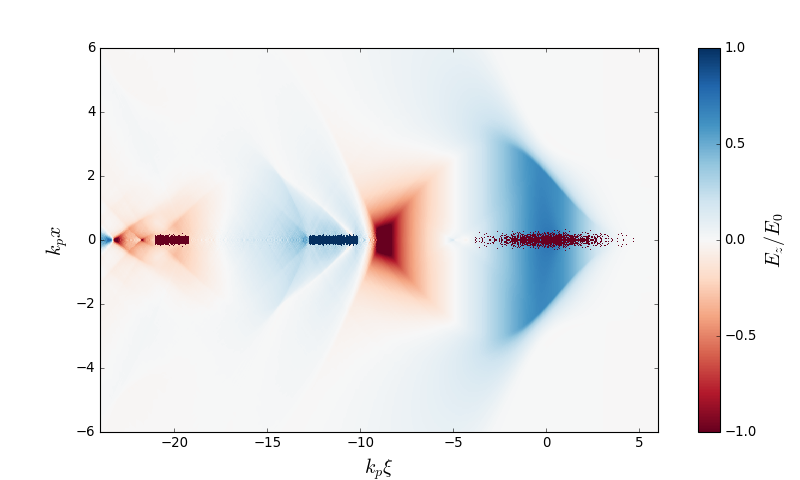

In [238]:
s = 1.
col = 'm'
pd = .5
prfl = 'k'

plt.close()
fig, axs = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 6)) # , gridspec_kw={'width_ratios': [1.75, 1]})
# plt.subplots_adjust(hspace=0.075)

im = axs.pcolormesh(data.info.z, data.info.x, data.ts.get_field(field = 'Ez_lev0', iteration = 0)[0].T, cmap = 'RdBu', vmin = -s, vmax = s) # level 0
axs.pcolormesh(data.info_lev1.z, data.info_lev1.x, data.ts.get_field(field = 'Ez_lev1', iteration = 0)[0].T, cmap = 'RdBu', vmin = -s, vmax = s) # level 1
# axs.pcolormesh(data.info.z, data.info.x, data.jz_beam.T * IA, cmap = 'RdBuT', vmin = -1e15, vmax = 1e15) # level 0
axs.pcolormesh(data.info_lev1.z, data.info_lev1.x, data.jz_beam_lev1.T * IA, cmap = 'RdBuT', vmin = -1e4, vmax = 1e4) # level 1

divider2 = make_axes_locatable(axs)
cax2 = divider2.append_axes("right", size = "4%", pad = pd)
# divider3 = make_axes_locatable(ax2)
# cax3 = divider3.append_axes("right", size = "4%", pad = pd)
# cax3.remove()
cb2 = plt.colorbar(im, cax = cax2)
cb2.set_label(r'$E_z/E_0 $', fontsize = 18)


axs.set_xlim(data.info.zmin, data.info.zmax)
axs.set_xlabel(r'$k_p\xi$', fontsize = 18)


axs.set_ylim(-6, 6)
axs.set_ylabel(r'$k_px$', fontsize = 18)

# plt.savefig('/Users/max/HiPACE/recovery/images/fNone.png', dpi = 300, bbox_inches = 'tight')
plt.show()

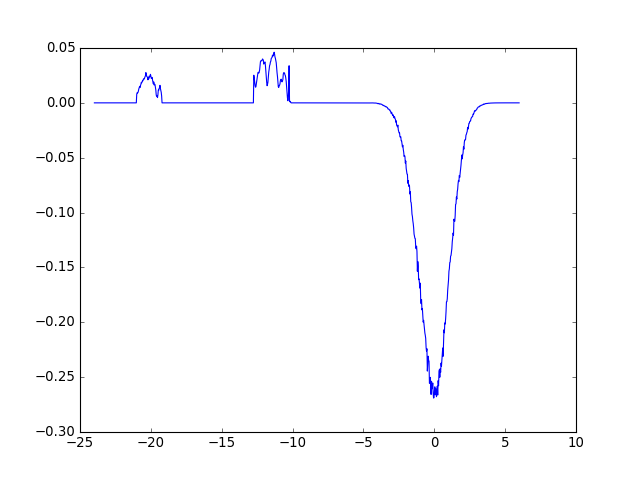

In [239]:
plt.close()
plt.plot(data.info.z, data.fieldsInsitu['[Ez*jz_beam]'][0])
plt.show()

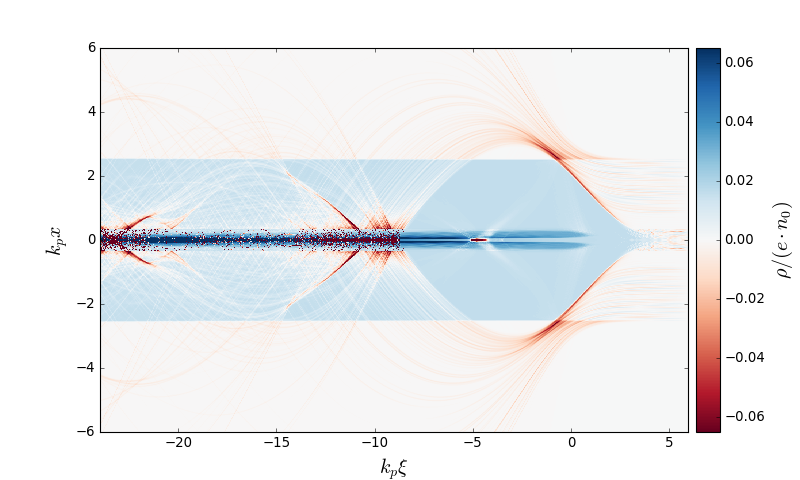

In [241]:
s = 6.5e-2
col = 'm'
pd = .1
prfl = 'k'

plt.close()
fig, axs = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 6)) # , gridspec_kw={'width_ratios': [1.75, 1]})
# plt.subplots_adjust(hspace=0.075)

im = axs.pcolormesh(data.info.z, data.info.x, data.ts.get_field(field = 'rho_lev0', iteration = 0)[0].T*(constants.e * data.n0), cmap = 'RdBu', vmin = -s, vmax = s) # level 0
axs.pcolormesh(data.info_lev1.z, data.info_lev1.x, data.ts.get_field(field = 'rho_lev1', iteration = 0)[0].T*(constants.e * data.n0), cmap = 'RdBu', vmin = -s, vmax = s) # level 1
# axs.pcolormesh(data.info.z, data.info.x, data.jz_beam.T * IA, cmap = 'RdBuT', vmin = -1e15, vmax = 1e15) # level 0
# axs.pcolormesh(data.info_lev1.z, data.info_lev1.x, data.jz_beam_lev1.T * IA, cmap = 'PuOrT', vmin = -1e4, vmax = 1e4) # level 1

divider2 = make_axes_locatable(axs)
cax2 = divider2.append_axes("right", size = "4%", pad = pd)
# divider3 = make_axes_locatable(ax2)
# cax3 = divider3.append_axes("right", size = "4%", pad = pd)
# cax3.remove()
cb2 = plt.colorbar(im, cax = cax2)
cb2.set_label(r'$\rho/(e \cdot n_0) $', fontsize = 18)


axs.set_xlim(data.info.zmin, data.info.zmax)
axs.set_xlabel(r'$k_p\xi$', fontsize = 18)


axs.set_ylim(-6, 6)
axs.set_ylabel(r'$k_px$', fontsize = 18)

# plt.savefig('/Users/max/HiPACE/recovery/images/fNone.png', dpi = 300, bbox_inches = 'tight')
plt.show()